# Plotting in Julia



- [Plots.jl](https://github.com/JuliaPlots/Plots.jl) which itself wraps many underlying plotting packages.
- [PythonPlot.jl](https://github.com/stevengj/PythonPlot.jl) interface to the well known `matplotlib` Python plotting package
  (formerly `PyPlot.jl`)
- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl) a grammar of graphics based plotting (similar to R, I think)
- [Makie.jl](https://github.com/MakieOrg/Makie.jl) a pure Julia, high-performance plotting package.  Cool, but slow to load.
- many more: UnicodePlots.jl, PlotlyJS.jl, PGFPlotsX.jl, GMT.jl, Gnuplot.jl, VegaLite.jl, etc.

**I will show-case Plots.jl and PythonCall.jl**

Follows [https://docs.juliaplots.org/latest/tutorial/](https://docs.juliaplots.org/latest/tutorial/)

# Plots.jl



**Pros**:
- widely used plotting package
- many packages provide out-of-the box functionality with Plots.jl
- can use different backends

**Cons**:
- fine-scale tweaks can be hard to do or find out how to do

I tend to rather use `PythonPlot.jl`

## Install Plots.jl

In [7]:
using Pkg; Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day1/33_plotting`


In [8]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day1/33_plotting/Project.toml`
  No Changes to `~/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day1/33_plotting/Manifest.toml`


## Basic usage


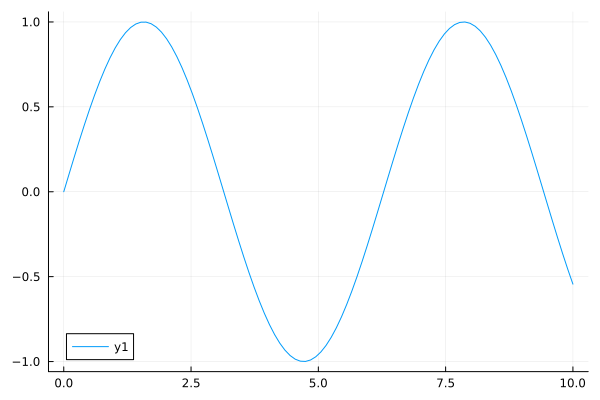

In [9]:
using Plots
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)


Plot another line plot, note the **!**

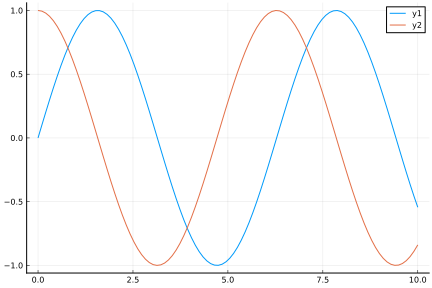

In [13]:
y = cos.(x)
plot!(x, y)


Save it as a file

In [14]:
savefig("test.png")

"/home/mauro/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/test.png"

## Refining plots: attributes

All attributes are listed [here](https://docs.juliaplots.org/latest/attributes/#attributes)

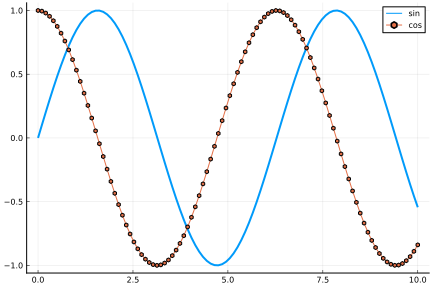

In [15]:
x = range(0, 10, length=100)
y = sin.(x)

plot(x, y, label="sin", linewidth=2)
c = cos.(x)
plot!(x, c, label="cos", marker = :hexagon)

## Refining plots: type of plots

scatter, heatmap, etc

See [gallery](https://docs.juliaplots.org/latest/gallery/pythonplot/)

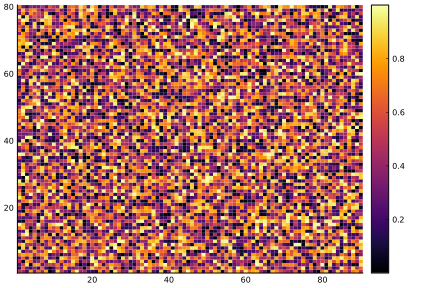

In [16]:
heatmap(rand(80,90))

## Subplots

[https://docs.juliaplots.org/latest/layouts/](https://docs.juliaplots.org/latest/layouts/)

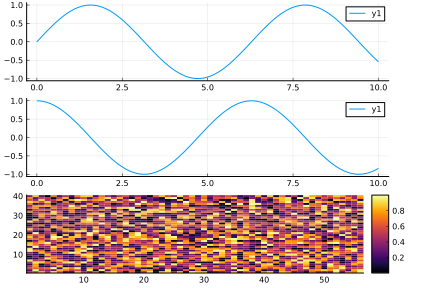

In [17]:
plot(plot(x, sin.(x)),
     plot(x, cos.(x)),
     heatmap(rand(40,56)),
     layout=(3,1)
     )

## Subplots

[https://docs.juliaplots.org/latest/layouts/](https://docs.juliaplots.org/latest/layouts/)

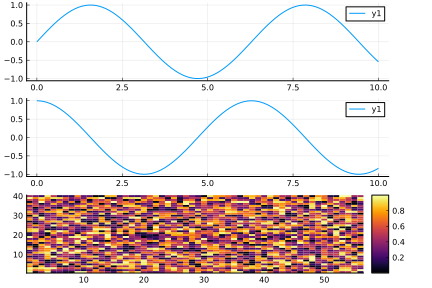

In [18]:
p1 = plot(x, sin.(x))
p2 = plot(x, cos.(x))
p3 = heatmap(rand(40,56))
plot(p1, p2, p3, layout=(3,1) )

## Plots.jl recipes

Many Julia packages provide so-called recipes to plot using Plots.jl

Example with [Measurements.jl](https://juliaphysics.github.io/Measurements.jl/stable/examples/#Integration-with-Plots.jl) plotting error-bars automatically

   Resolving package versions...
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Project.toml`
  No Changes to `~/julia/workshops/WSL-2023-with-victor/WSLJuliaWorkshop2023/Day1/33_plotting/Manifest.toml`


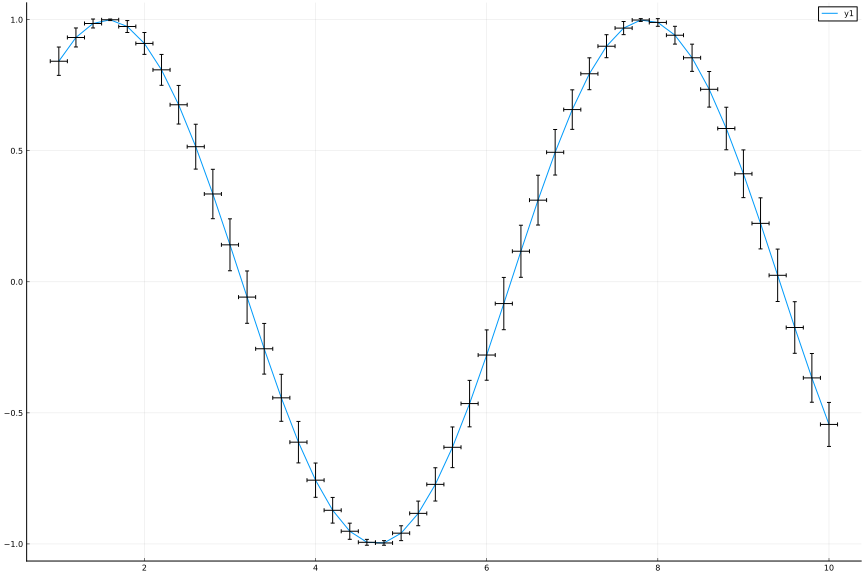

In [19]:
Pkg.add("Measurements")
using Measurements
x = [x ± 0.1 for x in 1:0.2:10] # these numbers now have an uncertainty of +/- 0.1
plot(x, sin.(x))

## Plots.jl backends

Plots.jl is a wrapper around other plotting libraries, so-called backends.
Different backends have different abilities, say zoom-able vs not.

Default is GR.jl (fast but not interactive)

In [11]:
Pkg.add("PythonPlot")
pythonplot()
# re-plot previous plot
plot(x, sin.(x),
     ticks=:native) # this can be useful, as only then ticks get re-rendered on zoom

   Resolving package versions...
  No Changes to `~/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day1/33_plotting/Project.toml`
  No Changes to `~/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day1/33_plotting/Manifest.toml`
┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
│   lock_file = /Users/victorboussange/Academia/Postdoc_S2z/teaching/iDiv_Julia_workshop/materials/Day1/33_plotting/.CondaPkg/lock
└ @ CondaPkg /Users/victorboussange/.julia/packages/CondaPkg/iPD6F/src/resolve.jl:530


# PythonPlot

- A simple wrapper around `matplotlib`, based on `PythonCall` (more on that later)
- advantage: benefits from the huge resources available on the web (Stackoverflow, matplotlib tutorials, ...)
- exports `plt` - syntax is then the same as in Python!

In [10]:
using PythonCall

fig, axs = subplots(2, 1)

axs[1].plot(1:100, randn(100))

axs[2].scatter(randn(100), randn(100), label = "foor")

for ax in axs
    axs.set_yscale("log")
end

gcf() # get current figure, can be useful to display it

display(fig) # is an alternative

fig.savefig("myfig", dpi = 300)

ArgumentError: ArgumentError: Package PythonCall not found in current path.
- Run `import Pkg; Pkg.add("PythonCall")` to install the PythonCall package.